# Handwritten Digits Recognition Models

*This notebook contains (edited/augmented) code from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas.*

### Import libraries

In [1]:
# image data
from sklearn.datasets import load_digits

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# export model
from joblib import dump

### Load and visualize data

In [2]:
# load data
digits = load_digits()
digits.images.shape

#1797 images 'digits', each digit has 8 by 8 grid

(1797, 8, 8)

The images data is a three-dimensional array: 1,797 samples each consisting of an 8 × 8 grid of pixels.
Let's visualize the first hundred of these:

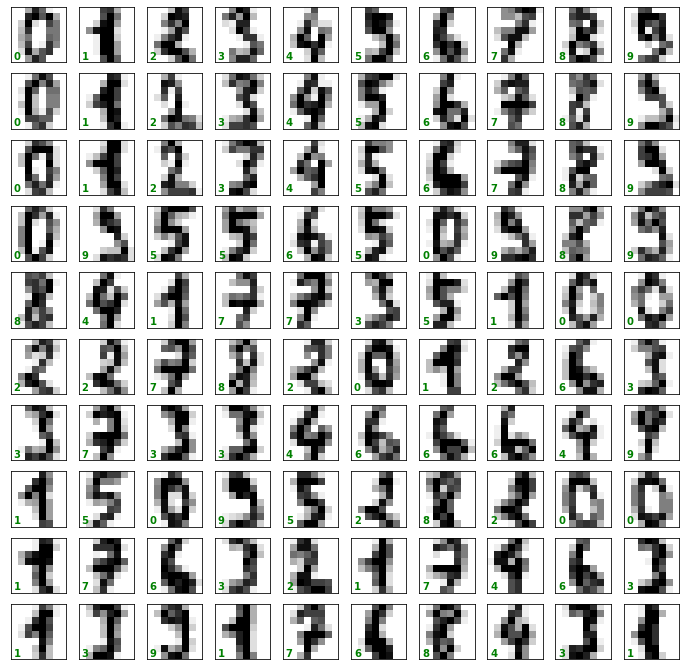

In [5]:
fig, axes = plt.subplots(10, 10, figsize=(12, 12), subplot_kw={'xticks':[], 'yticks':[]})

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[i]), color='green', 
            weight='semibold', transform=ax.transAxes)

### Digits Classification Model

In [6]:
# grab all data (1797 records, and 8x8=64 columns)
X = digits.data

# grab the target (true) value for each image
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=314)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1347, 64) (1347,) (450, 64) (450,)


In [7]:
# define the model object
clf = RandomForestClassifier(random_state=314, max_depth=4, n_estimators=10)

# fit (train) the model
clf.fit(X_train, y_train)

# make predictions on the test data
y_preds = clf.predict(X_test)

print(f'Model accuracy: {accuracy_score(y_preds, y_test):.2%}')

Model accuracy: 87.11%


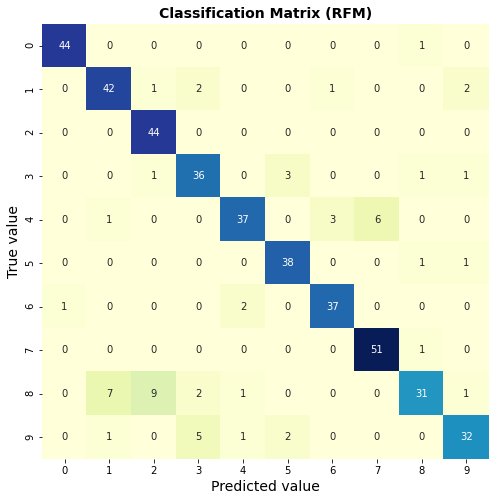

In [9]:
# confusion matrix
cfm = confusion_matrix(y_test, y_preds)
plt.figure(figsize=(8, 8))

sns.heatmap(cfm, annot=True, cbar=False, cmap='YlGnBu')
plt.xlabel('Predicted value', fontsize=14)
plt.ylabel('True value', fontsize=14)
plt.title('Classification Matrix (RFM)', fontsize=14, weight='semibold');